In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
# (60000, 28, 28) 
x_train.shape

# (10000, 28, 28)
x_test.shape

(10000, 28, 28)

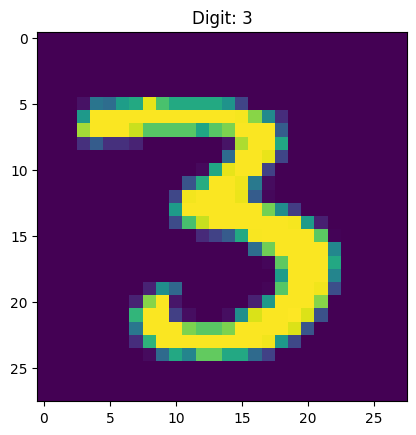

In [20]:
plt.figezsize=(8,8)
plt.imshow(x_train[12])
plt.title(f"Digit: {y_train[12]}")
plt.show()

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 256, activation='sigmoid'),
    tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dense(units = 10, activation='softmax')
    ])

In [59]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
y_train.shape

(60000,)

In [61]:
# first, we have to compline our model...

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [62]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8670 - loss: 0.4404
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8947 - loss: 0.3417
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9086 - loss: 0.2921
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9190 - loss: 0.2643
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9259 - loss: 0.2401


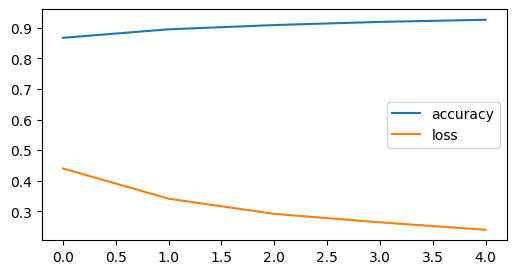

In [63]:
plt.figure(figsize=(6, 3))
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label ='loss')
plt.legend()
plt.show()

In [64]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9219 - loss: 0.2480


[0.24795211851596832, 0.9218999743461609]

In [ ]:
# Loss, Accuracy
# [0.24795211851596832, 0.9218999743461609]